In [17]:
from google.colab import files
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from nltk.tokenize import regexp_tokenize
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeRegressor

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [94]:
df_train = pd.read_csv('Training Data Set.csv')
df_train

,CVSS,Plugin ID,CVE,Protocol,Port,Name,Synopsis,Description,Solution,See Also
0,10.0,33850,NaN,tcp,0,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...,NaN
1,10.0,33850,NaN,tcp,0,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...,NaN
2,10.0,33850,NaN,tcp,0,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...,NaN
3,10.0,33850,NaN,tcp,0,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...,NaN
4,10.0,33850,NaN,tcp,0,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...,NaN
...,...,...,...,...,...,...,...,...,...,...
23913,1.9,128115,CVE-2019-1552,tcp,443,OpenSSL 1.0.2 < 1.0.2t Vulnerability,The remote service is affected by a vulnerabil...,The version of tested product installed on the...,Upgrade to OpenSSL version 1.0.2t or later.,http://www.nessus.org/u?27ebc9b1\nhttps://www....
23914,1.9,122591,CVE-2018-10545,tcp,443,PHP 5.6.x < 5.6.35 Security Bypass Vulnerability,The version of PHP running on the remote web s...,"According to its banner, the version of PHP ru...",Upgrade to PHP version 5.6.35 or later.,http://php.net/ChangeLog-5.php#5.6.35
23915,1.9,128115,CVE-2019-1552,tcp,80,OpenSSL 1.0.2 < 1.0.2t Vulnerability,The remote service is affected by a vulnerabil...,The version of tested product installed on the...,Upgrade to OpenSSL version 1.0.2t or later.,http://www.nessus.org/u?27ebc9b1\nhttps://www....
23916,1.9,128115,CVE-2019-1552,tcp,443,OpenSSL 1.0.2 < 1.0.2t Vulnerability,The remote service is affected by a vulnerabil...,The version of tested product installed on the...,Upgrade to OpenSSL version 1.0.2t or later.,http://www.nessus.org/u?27ebc9b1\nhttps://www....


In [95]:
df_train.isnull().sum()

CVSS              0
Plugin ID         0
CVE            7832
Protocol          0
Port              0
Name              0
Synopsis          0
Description       0
Solution          1
See Also       3334
dtype: int64

In [96]:
df_train.corr()

,CVSS,Plugin ID,Port
CVSS,1.000000,0.103253,-0.174706
Plugin ID,0.103253,1.000000,-0.033070
Port,-0.174706,-0.033070,1.000000


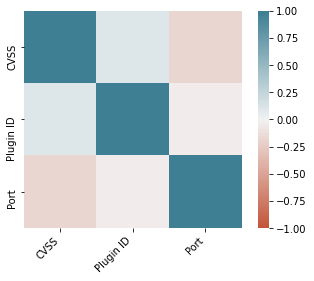

In [97]:
corr = df_train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

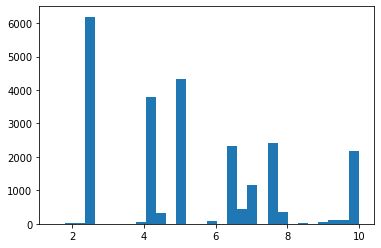

In [98]:
plt.hist(df_train['CVSS'], bins = 30);

In [99]:
df_train['Protocol'].value_counts()

tcp    23822
udp       96
Name: Protocol, dtype: int64

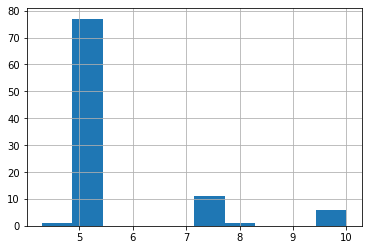

In [100]:
df_train[df_train['Protocol'] == 'udp']['CVSS'].hist();

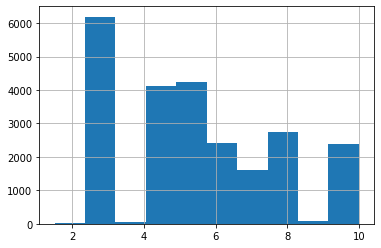

In [101]:
df_train[df_train['Protocol'] == 'tcp']['CVSS'].hist();

In [102]:
df_train = df_train.drop(['CVE', 'See Also', 'Protocol', 'Port'], axis=1)
df_train = df_train.dropna()
df_train

,CVSS,Plugin ID,Name,Synopsis,Description,Solution
0,10.0,33850,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...
1,10.0,33850,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...
2,10.0,33850,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...
3,10.0,33850,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...
4,10.0,33850,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...
...,...,...,...,...,...,...
23913,1.9,128115,OpenSSL 1.0.2 < 1.0.2t Vulnerability,The remote service is affected by a vulnerabil...,The version of tested product installed on the...,Upgrade to OpenSSL version 1.0.2t or later.
23914,1.9,122591,PHP 5.6.x < 5.6.35 Security Bypass Vulnerability,The version of PHP running on the remote web s...,"According to its banner, the version of PHP ru...",Upgrade to PHP version 5.6.35 or later.
23915,1.9,128115,OpenSSL 1.0.2 < 1.0.2t Vulnerability,The remote service is affected by a vulnerabil...,The version of tested product installed on the...,Upgrade to OpenSSL version 1.0.2t or later.
23916,1.9,128115,OpenSSL 1.0.2 < 1.0.2t Vulnerability,The remote service is affected by a vulnerabil...,The version of tested product installed on the...,Upgrade to OpenSSL version 1.0.2t or later.


In [103]:
df_test = pd.read_csv('Testing Data Set.csv')
df_test

,Plugin ID,CVE,Protocol,Port,Name,Synopsis,Description,Solution,See Also
0,90150,CVE-2015-1791,tcp,2381,HP System Management Homepage < 7.5.4 Multiple...,The remote web server is affected by multiple ...,"According to the web server's banner, the vers...",Upgrade to HP System Management Homepage (SMH)...,http://www.nessus.org/u?d91095a9\nhttps://weak...
1,90150,CVE-2015-1792,tcp,2381,HP System Management Homepage < 7.5.4 Multiple...,The remote web server is affected by multiple ...,"According to the web server's banner, the vers...",Upgrade to HP System Management Homepage (SMH)...,http://www.nessus.org/u?d91095a9\nhttps://weak...
2,90150,CVE-2015-1793,tcp,2381,HP System Management Homepage < 7.5.4 Multiple...,The remote web server is affected by multiple ...,"According to the web server's banner, the vers...",Upgrade to HP System Management Homepage (SMH)...,http://www.nessus.org/u?d91095a9\nhttps://weak...
3,90150,CVE-2015-3143,tcp,2381,HP System Management Homepage < 7.5.4 Multiple...,The remote web server is affected by multiple ...,"According to the web server's banner, the vers...",Upgrade to HP System Management Homepage (SMH)...,http://www.nessus.org/u?d91095a9\nhttps://weak...
4,90150,CVE-2015-3145,tcp,2381,HP System Management Homepage < 7.5.4 Multiple...,The remote web server is affected by multiple ...,"According to the web server's banner, the vers...",Upgrade to HP System Management Homepage (SMH)...,http://www.nessus.org/u?d91095a9\nhttps://weak...
...,...,...,...,...,...,...,...,...,...
2592,65821,CVE-2015-2808,tcp,3389,SSL RC4 Cipher Suites Supported (Bar Mitzvah),The remote service supports the use of the RC4...,The remote host supports the use of RC4 in one...,"Reconfigure the affected application, if possi...",http://www.nessus.org/u?ac7327a0\nhttp://cr.yp...
2593,83738,CVE-2015-4000,tcp,5666,SSL/TLS EXPORT_DHE <= 512-bit Export Cipher Su...,The remote host supports a set of weak ciphers.,The remote host supports EXPORT_DHE cipher sui...,Reconfigure the service to remove support for ...,https://weakdh.org/
2594,83875,CVE-2015-4000,tcp,443,SSL/TLS Diffie-Hellman Modulus <= 1024 Bits (L...,The remote host allows SSL/TLS connections wit...,The remote host allows SSL/TLS connections wit...,Reconfigure the service to use a unique Diffie...,https://weakdh.org/
2595,31705,CVE-2007-1858,tcp,5666,SSL Anonymous Cipher Suites Supported,The remote service supports the use of anonymo...,The remote host supports the use of anonymous ...,Reconfigure the affected application if possib...,http://www.nessus.org/u?3a040ada


In [104]:
df_test.isnull().sum()

Plugin ID        0
CVE            626
Protocol         0
Port             0
Name             0
Synopsis         0
Description      0
Solution         0
See Also       274
dtype: int64

In [105]:
df_test = df_test.drop(['CVE', 'See Also', 'Protocol', 'Port'], axis=1)
df_test = df_test.dropna()
df_test

,Plugin ID,Name,Synopsis,Description,Solution
0,90150,HP System Management Homepage < 7.5.4 Multiple...,The remote web server is affected by multiple ...,"According to the web server's banner, the vers...",Upgrade to HP System Management Homepage (SMH)...
1,90150,HP System Management Homepage < 7.5.4 Multiple...,The remote web server is affected by multiple ...,"According to the web server's banner, the vers...",Upgrade to HP System Management Homepage (SMH)...
2,90150,HP System Management Homepage < 7.5.4 Multiple...,The remote web server is affected by multiple ...,"According to the web server's banner, the vers...",Upgrade to HP System Management Homepage (SMH)...
3,90150,HP System Management Homepage < 7.5.4 Multiple...,The remote web server is affected by multiple ...,"According to the web server's banner, the vers...",Upgrade to HP System Management Homepage (SMH)...
4,90150,HP System Management Homepage < 7.5.4 Multiple...,The remote web server is affected by multiple ...,"According to the web server's banner, the vers...",Upgrade to HP System Management Homepage (SMH)...
...,...,...,...,...,...
2592,65821,SSL RC4 Cipher Suites Supported (Bar Mitzvah),The remote service supports the use of the RC4...,The remote host supports the use of RC4 in one...,"Reconfigure the affected application, if possi..."
2593,83738,SSL/TLS EXPORT_DHE <= 512-bit Export Cipher Su...,The remote host supports a set of weak ciphers.,The remote host supports EXPORT_DHE cipher sui...,Reconfigure the service to remove support for ...
2594,83875,SSL/TLS Diffie-Hellman Modulus <= 1024 Bits (L...,The remote host allows SSL/TLS connections wit...,The remote host allows SSL/TLS connections wit...,Reconfigure the service to use a unique Diffie...
2595,31705,SSL Anonymous Cipher Suites Supported,The remote service supports the use of anonymo...,The remote host supports the use of anonymous ...,Reconfigure the affected application if possib...


In [106]:
df = pd.concat([df_train,df_test]) 
df

,CVSS,Plugin ID,Name,Synopsis,Description,Solution
0,10.0,33850,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...
1,10.0,33850,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...
2,10.0,33850,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...
3,10.0,33850,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...
4,10.0,33850,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...
...,...,...,...,...,...,...
2592,NaN,65821,SSL RC4 Cipher Suites Supported (Bar Mitzvah),The remote service supports the use of the RC4...,The remote host supports the use of RC4 in one...,"Reconfigure the affected application, if possi..."
2593,NaN,83738,SSL/TLS EXPORT_DHE <= 512-bit Export Cipher Su...,The remote host supports a set of weak ciphers.,The remote host supports EXPORT_DHE cipher sui...,Reconfigure the service to remove support for ...
2594,NaN,83875,SSL/TLS Diffie-Hellman Modulus <= 1024 Bits (L...,The remote host allows SSL/TLS connections wit...,The remote host allows SSL/TLS connections wit...,Reconfigure the service to use a unique Diffie...
2595,NaN,31705,SSL Anonymous Cipher Suites Supported,The remote service supports the use of anonymo...,The remote host supports the use of anonymous ...,Reconfigure the affected application if possib...


In [107]:
df['text'] = df['Name'] + ' ' + df['Synopsis'] + ' ' + df['Description'] + ' ' + df['Solution']
lemmatizer = WordNetLemmatizer()
clean_text = []
# cleaning and removing stop words
for text in df['text']:
    words = regexp_tokenize(text.lower(), r'[A-Za-z]+')
    words = [w for w in words if len(w)>1 and w not in stopwords.words('english')]
    words = [lemmatizer.lemmatize(w) for w in words]
    clean_text.append(' '.join(words))

len(clean_text)
df['clean_text'] = clean_text
df.head()


,CVSS,Plugin ID,Name,Synopsis,Description,Solution,text,clean_text
0,10.0,33850,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...,Unix Operating System Unsupported Version Dete...,unix operating system unsupported version dete...
1,10.0,33850,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...,Unix Operating System Unsupported Version Dete...,unix operating system unsupported version dete...
2,10.0,33850,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...,Unix Operating System Unsupported Version Dete...,unix operating system unsupported version dete...
3,10.0,33850,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...,Unix Operating System Unsupported Version Dete...,unix operating system unsupported version dete...
4,10.0,33850,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...,Unix Operating System Unsupported Version Dete...,unix operating system unsupported version dete...


In [108]:
clean_text

['unix operating system unsupported version detection operating system running remote host longer supported according self reported version number unix operating system running remote host longer supported lack support implies new security patch product released vendor result likely contain security vulnerability upgrade version unix operating system currently supported',
 'unix operating system unsupported version detection operating system running remote host longer supported according self reported version number unix operating system running remote host longer supported lack support implies new security patch product released vendor result likely contain security vulnerability upgrade version unix operating system currently supported',
 'unix operating system unsupported version detection operating system running remote host longer supported according self reported version number unix operating system running remote host longer supported lack support implies new security patch prod

In [109]:
tf = TfidfVectorizer()
text = tf.fit_transform(clean_text)

In [110]:
tf.get_feature_names()

['aaa',
 'ability',
 'able',
 'abuse',
 'abused',
 'acceleration',
 'accept',
 'acceptable',
 'acceptance',
 'acceptfilter',
 'accepting',
 'accepts',
 'access',
 'accessed',
 'accessible',
 'accessing',
 'accordance',
 'according',
 'account',
 'accumulation',
 'accurate',
 'acknowledge',
 'acknowledgment',
 'acl',
 'acls',
 'acme',
 'across',
 'act',
 'action',
 'active',
 'activity',
 'actual',
 'actually',
 'ad',
 'adaptive',
 'adb',
 'add',
 'added',
 'adding',
 'addition',
 'additional',
 'additionally',
 'addn',
 'address',
 'adequately',
 'adjust',
 'adjusting',
 'admin',
 'administration',
 'administrator',
 'advance',
 'advanced',
 'adversary',
 'advertises',
 'advised',
 'advises',
 'advisory',
 'aes',
 'aesni',
 'affect',
 'affected',
 'aforementioned',
 'agent',
 'aid',
 'ajp',
 'aka',
 'alert',
 'algorithm',
 'alloc',
 'allocated',
 'allocating',
 'allocation',
 'allow',
 'allowed',
 'allowing',
 'allowoverride',
 'allows',
 'along',
 'alphabet',
 'already',
 'also',
 'al

In [111]:
text.shape

(26514, 2627)

In [114]:
train = text[0:len(df_train)]

In [118]:
len(df_train)+len(df_test)

26514

In [127]:
test = text[len(df_train):]

In [129]:
X = train
y = df_train['CVSS']

In [130]:
tf.get_feature_names()

['aaa',
 'ability',
 'able',
 'abuse',
 'abused',
 'acceleration',
 'accept',
 'acceptable',
 'acceptance',
 'acceptfilter',
 'accepting',
 'accepts',
 'access',
 'accessed',
 'accessible',
 'accessing',
 'accordance',
 'according',
 'account',
 'accumulation',
 'accurate',
 'acknowledge',
 'acknowledgment',
 'acl',
 'acls',
 'acme',
 'across',
 'act',
 'action',
 'active',
 'activity',
 'actual',
 'actually',
 'ad',
 'adaptive',
 'adb',
 'add',
 'added',
 'adding',
 'addition',
 'additional',
 'additionally',
 'addn',
 'address',
 'adequately',
 'adjust',
 'adjusting',
 'admin',
 'administration',
 'administrator',
 'advance',
 'advanced',
 'adversary',
 'advertises',
 'advised',
 'advises',
 'advisory',
 'aes',
 'aesni',
 'affect',
 'affected',
 'aforementioned',
 'agent',
 'aid',
 'ajp',
 'aka',
 'alert',
 'algorithm',
 'alloc',
 'allocated',
 'allocating',
 'allocation',
 'allow',
 'allowed',
 'allowing',
 'allowoverride',
 'allows',
 'along',
 'alphabet',
 'already',
 'also',
 'al

In [131]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1, shuffle=True)

In [132]:
model_rf = RandomForestRegressor(n_estimators=100)
model_rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [133]:
y_hat_rf = model_rf.predict(x_test)
model_rf_mse=mean_squared_error(y_test, y_hat_rf)
print("Mean suqred error = ", model_rf_mse)

Mean suqred error =  0.0059709149833477556


In [135]:
model_NN = MLPRegressor()
model_NN.fit(x_train ,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [136]:
y_hat_NN = model_NN.predict(x_test)
model_NN_mse=mean_squared_error(y_test, y_hat_NN)
print("Mean suqred error = ", model_NN_mse)

Mean suqred error =  0.005674502479016425


In [138]:
model_DT = DecisionTreeRegressor(random_state = 0) 
model_DT.fit(x_train ,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [139]:
y_hat_DT = model_DT.predict(x_test)
model_DT_mse=mean_squared_error(y_test, y_hat_DT)
print("Mean suqred error = ", model_DT_mse)

Mean suqred error =  0.0009428778799702697


In [140]:
y_hat_DT_t = model_DT.predict(test)
print(y_hat_DT_t)
print(len(y_hat_DT_t))

[10.  10.  10.  ...  2.6  2.6  2.6]
2597


In [141]:
prediction = pd.DataFrame(y_hat_DT_t, columns=['CVSS_prediction']).to_csv('prediction.csv')

In [142]:
test_error=[model_rf_mse,model_NN_mse,model_DT_mse]
col={'Test Error':test_error}
models=['Random Forest','Neural network','Decision Tree']
result=pd.DataFrame(data=col,index=models)
result

,Test Error
Random Forest,0.005971
Neural network,0.005675
Decision Tree,0.000943


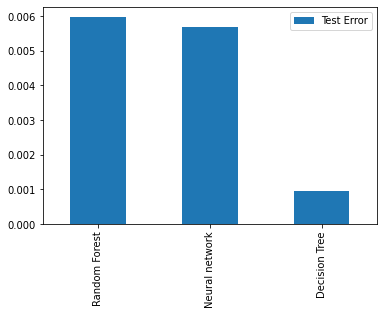

In [143]:
result.plot(kind='bar')